 Summary
1. Get Data
2. Data transformation
3. Split Data into train and test sets
4. Feature reduction
5. Train a SVM classification model
6. Predict Model
7. Predict Model: Qualitative evaluation


In [9]:
%matplotlib inline
from __future__ import print_function
from time import time
import logging
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import RandomizedPCA
from sklearn.svm import SVC

# Display progress logs on stdout
#logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

# 1. Get Data

In [2]:
# Download the images and stored it on your hard drive
# Use at least 70 different faces per person and resize the images
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# 2. Data transformation

In [3]:
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# we want to predict the label of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("#############################")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Total dataset size:
#############################
n_samples: 1288
n_features: 1850
n_classes: 7


# 3. Split Data into train and test sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

# 4. Feature reduction

In [5]:
# Compute a PCA (Eigenface)
n_components = 150
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Projecting the input data on the eigenfaces orthonormal basis


# 5. Train a SVM classification model

In [6]:
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)

# 6. Predict Model

In [7]:
print("Predicting people's names on the test set")
y_pred = clf.predict(X_test_pca)
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

Predicting people's names on the test set
                   precision    recall  f1-score   support

     Ariel Sharon       0.92      0.85      0.88        13
     Colin Powell       0.84      0.87      0.85        60
  Donald Rumsfeld       0.87      0.74      0.80        27
    George W Bush       0.86      0.95      0.91       146
Gerhard Schroeder       1.00      0.84      0.91        25
      Hugo Chavez       1.00      0.73      0.85        15
       Tony Blair       0.97      0.86      0.91        36

      avg / total       0.89      0.89      0.88       322

[[ 11   0   0   2   0   0   0]
 [  0  52   1   6   0   0   1]
 [  0   1  20   6   0   0   0]
 [  1   4   2 139   0   0   0]
 [  0   0   0   4  21   0   0]
 [  0   1   0   3   0  11   0]
 [  0   4   0   1   0   0  31]]


# 7. Predict Model: Qualitative evaluation

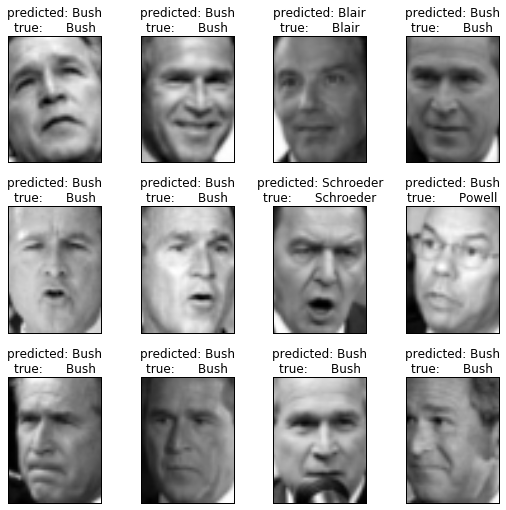

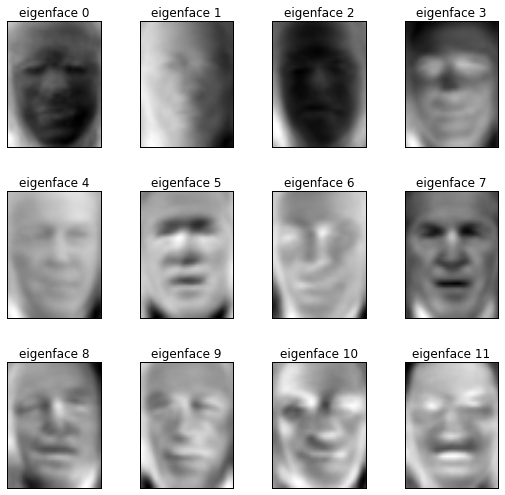

In [10]:

def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


# plot the result of the prediction on a portion of the test set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()



In [ ]:
# reference:  http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html